<a href="https://colab.research.google.com/github/sofiyaefimova302-png/Efimova-Sophya/blob/main/%22vectors%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [34]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-12-08 23:56:18--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv.1’

test.csv.1          100%[===================>] 100.42K  --.-KB/s    in 0.006s  

2025-12-08 23:56:18 (17.8 MB/s) - ‘test.csv.1’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [35]:
import pandas as pd
df = pd.read_csv('test.csv')
text_data = df['text']

3. Извлечь столбец с текстами (макс. балл == 1)

In [36]:
import pandas as pd
df = pd.read_csv('test.csv')
texts = df['text']


4. Построить Bag-of-Words (макс. балл == 3)

Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]
Документ 2: [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
Документ 3: [(0, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]
Документ 4: [(17, 1), (38, 4), (40, 1), (41, 2), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 2)]
Документ 5: [(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)]
Документ 6: [(8, 2), (10, 1), (14, 1), (30, 1), (46, 1), (48, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)]
Документ 7: [(1, 1), (6, 1), (8, 1), (12, 1), (38, 1), (40, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1

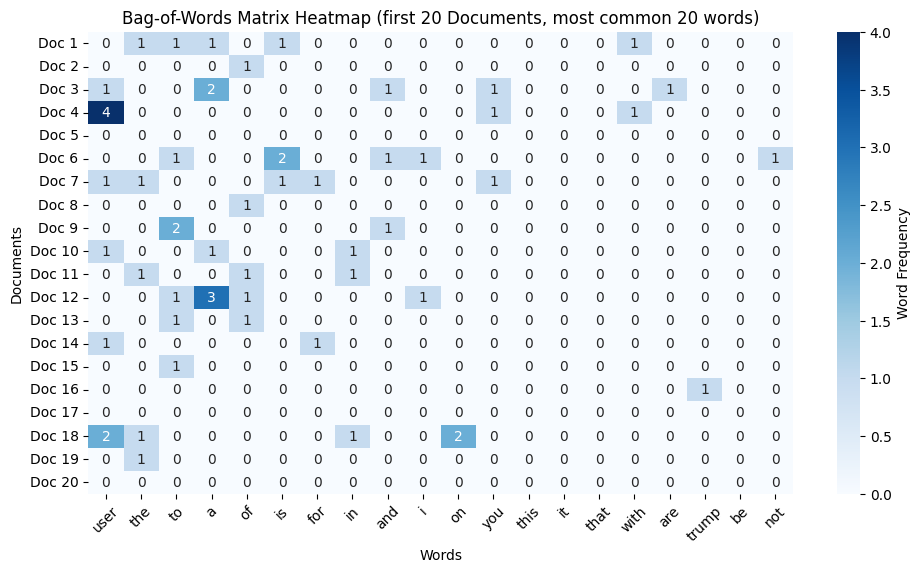

In [37]:
!pip install gensim
import gensim
from gensim import corpora
from gensim.models import TfidfModel
from gensim.parsing.preprocessing import remove_stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# привожу тексты к нижнему регистру
texts_lower = texts.str.lower()
# удаляю знаки препинания и иные символы
texts_clean = texts_lower.str.replace(r'[^(\w|\s)]', '', regex=True)
# строю словарь
texts_dictionary = texts_clean.str.split()
dictionary = corpora.Dictionary(texts_dictionary)
# преобразую документы в BoW векторы
bow_corpus = [dictionary.doc2bow(doc) for doc in texts_dictionary]
for i, doc_vec in enumerate(bow_corpus[:10], 1):
    print(f"Документ {i}: {doc_vec}")
# создаю таблицу частот слов
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)

# ищу индексы 20 самых частых слов
most_common_ind = []
for i in sorted(dictionary.most_common(20), key=lambda item: item[1], reverse=True):
    most_common_ind.append(dictionary.token2id[i[0]])

# для будущей визуализации беру первые 20 документов и 20 самых частовстречающихся слов
matrix = np.array(dense_vectors)[:20, most_common_ind]
words = [i[0] for i in dictionary.most_common(20)]
doc_names = [f"Doc {i+1}" for i in range(len(texts_dictionary))][:20]

# строю heatmap матрицы BoW
plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap (first 20 Documents, most common 20 words)')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')
# печатаю самые частовстречающиеся слова в корпусе (и их частоту)
for i in dictionary.most_common(20):
    print(f'{i[0]} - {i[1]}')

5. Построить TF-IDF (макс. балл == 5)

In [38]:
import pandas as pd
import re
from gensim import corpora, models

# первоначальная (упрощённая) версия TF-IDF
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

# чищу (удаляю ненужные символы, пробелы, привожу к нижнему регистру)
processed_texts = [re.sub(r'[^\w\s]', '', str(text).lower()).split() for text in texts]

# gensim TF-IDF
dictionary = corpora.Dictionary(processed_texts)
bow_corpus = [dictionary.doc2bow(text) for text in processed_texts]

tfidf_model = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

# сохраняю TF-IDF векторы
tfidf_data = []
for doc_id, doc_vector in enumerate(tfidf_corpus):
    for word_id, score in doc_vector:
        tfidf_data.append({
            'doc_id': doc_id,
            'word_id': word_id,
            'word': dictionary[word_id],
            'tfidf_score': score
        })

tfidf_df = pd.DataFrame(tfidf_data)
tfidf_df.to_csv('tfidf_assay.csv', index=False)
print("TF-IDF сохранен в 'tfidf_assay.csv'")

TF-IDF сохранен в 'tfidf_assay.csv'


##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

Наиболее частовтречающиеся слова для сравнения: ['user', 'the', 'for', 'and']


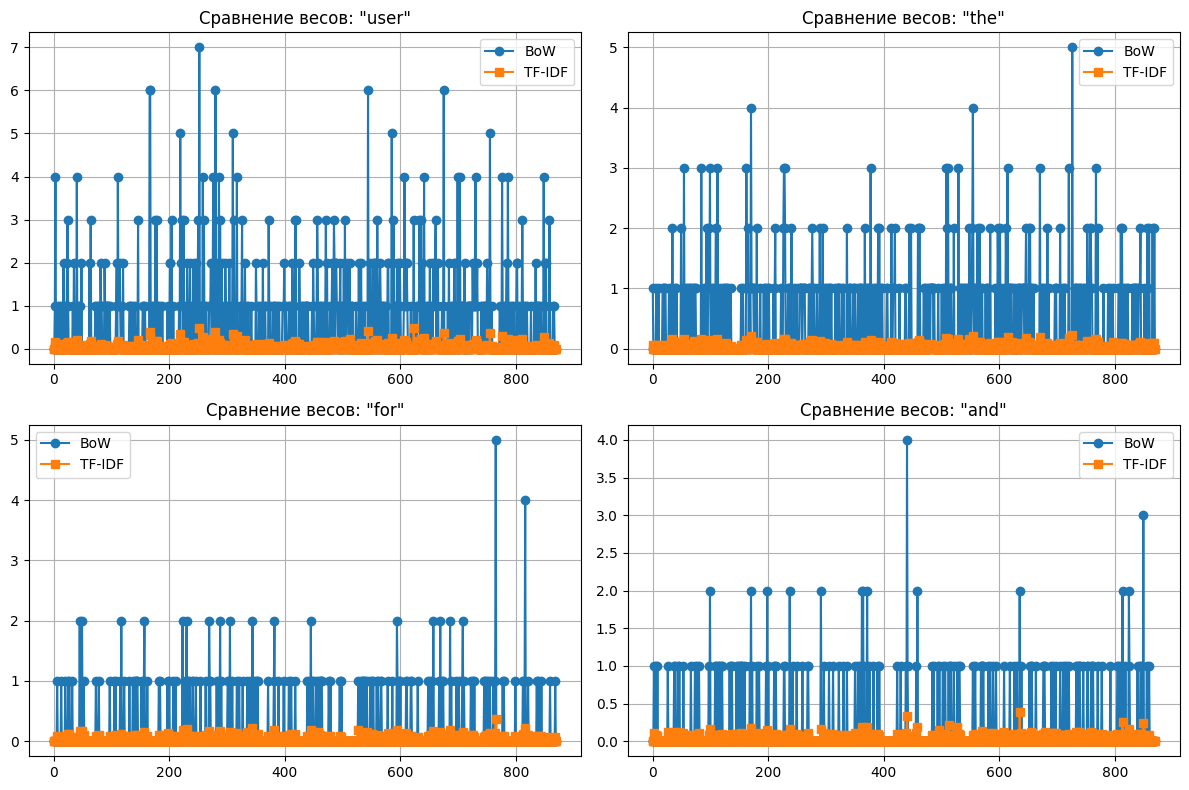

In [45]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from gensim import corpora, models

# Простая версия сравнения
df = pd.read_csv('test.csv')
texts = df['text'].tolist()

# Предобработка
processed_texts = [re.sub(r'[^\w\s]', '', str(text).lower()).split() for text in texts]

# Создаем модели
dictionary = corpora.Dictionary(processed_texts)
bow_corpus = [dictionary.doc2bow(text) for text in processed_texts]
tfidf_model = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

# Автоматический выбор 4 частых слов
from collections import Counter
word_freq = Counter()
for text in processed_texts:
    word_freq.update(text)

common_words_to_compare = [word for word, freq in word_freq.most_common(10) if len(word) > 2][:4]

# Сравнение
plt.figure(figsize=(12, 8))
for i, word in enumerate(common_words_to_compare):
    if word in dictionary.token2id:
        word_id = dictionary.token2id[word]

        bow_weights = []
        tfidf_weights = []

        for doc_id in range(len(processed_texts)):
            bow_dict = dict(bow_corpus[doc_id])
            tfidf_dict = dict(tfidf_corpus[doc_id])

            bow_weights.append(bow_dict.get(word_id, 0))
            tfidf_weights.append(tfidf_dict.get(word_id, 0))

        plt.subplot(2, 2, i+1)
        plt.plot(bow_weights, label='BoW', marker='o')
        plt.plot(tfidf_weights, label='TF-IDF', marker='s')
        plt.title(f'Сравнение весов: "{word}"')
        plt.legend()
        plt.grid(True)
print(f"Наиболее частовтречающиеся слова для сравнения: {common_words_to_compare}")
plt.tight_layout()
plt.show()

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```